## Exploratory Data Analysis

- In this notebook, I will explore the data and try to understand the data distribution and the relationship between the features and the target variable.

- I will also try to find the best features that can be used to predict the target variable.

In [3]:
# importing relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# importing the data

data = "/Users/alexandreribeiro/Documents/GitHub/final_project/data/clean/cleaned_city_health_metrics.csv"

df = pd.read_csv(data)

df.head()

,city,state,country,greenspacearea_km2,adjusted_obesity_rate,adjusted_smoking_rate,adjusted_exercising_rate,adjusted_chronic_rate,adjusted_life_expectancy,population_city,population_state
0,New York,New York,United States,9.58,29.080927,11.110653,48.983488,15.168457,75.069369,18908608.0,19571216
1,Chicago,Illinois,United States,0.29,22.616110,8.667252,33.856453,10.563213,52.003511,8497759.0,12549689
2,Miami,Florida,United States,35.57,8.497409,3.226864,14.601560,4.436938,20.840164,6080145.0,22610726
3,Houston,Texas,United States,52.57,6.948084,2.348648,9.668602,3.248963,14.972632,5970127.0,30503301
4,Dallas,Texas,United States,79.91,6.786088,2.293889,9.443176,3.173213,14.623542,5830932.0,30503301


#### Data Overview:

- Checking Data Types: Verifying the data types of each column to ensure they are appropriate for analysis (e.g., numeric types for continuous features, categorical types for categories).

In [4]:
df.dtypes

city                         object
state                        object
country                      object
greenspacearea_km2          float64
adjusted_obesity_rate       float64
adjusted_smoking_rate       float64
adjusted_exercising_rate    float64
adjusted_chronic_rate       float64
adjusted_life_expectancy    float64
population_city             float64
population_state              int64
dtype: object

In [5]:
df.describe()

,greenspacearea_km2,adjusted_obesity_rate,adjusted_smoking_rate,adjusted_exercising_rate,adjusted_chronic_rate,adjusted_life_expectancy,population_city,population_state
count,3361.000000,3361.000000,3361.000000,3361.000000,3361.000000,3361.000000,3.361000e+03,3.361000e+03
mean,99.317132,0.356899,0.145620,0.543922,0.183247,0.815424,8.417195e+04,1.341434e+07
std,90.988763,1.421453,0.575939,2.234051,0.724476,3.344020,4.760272e+05,1.125153e+07
min,0.010000,0.006151,0.002167,0.011995,0.003174,0.017292,8.506000e+03,5.840570e+05
25%,17.100000,0.037951,0.015056,0.061104,0.019504,0.090200,1.235600e+04,5.737915e+06
50%,74.550000,0.078786,0.031584,0.118249,0.041217,0.180180,1.934900e+04,9.290841e+06
75%,164.690000,0.194567,0.077543,0.291634,0.100211,0.445089,4.084200e+04,1.957122e+07
max,365.580000,29.080927,11.110653,48.983488,15.168457,75.069369,1.890861e+07,3.896519e+07


**Observations from describe():**

Green Space Area (greenspacearea_km2):

- The mean green space area is 99.32 km² with a standard deviation of 90.99 km², indicating significant variability across cities.
- The maximum value is 365.58 km², which suggests some cities have extensive green spaces.

Health Metrics:

- Metrics like adjusted_obesity_rate, adjusted_smoking_rate, and adjusted_exercising_rate have high standard deviations relative to their means, which indicates considerable variation across cities.
- For instance, the adjusted_obesity_rate ranges from 0.006 to 29.08, showing a wide disparity in obesity rates among different cities.

Life Expectancy (adjusted_life_expectancy):

- The mean life expectancy is 0.8154 with a significant standard deviation of 3.3440, which might suggest that the feature is scaled or normalized in some way.

In [6]:
# checking for missing values

df.isnull().sum()

city                        0
state                       0
country                     0
greenspacearea_km2          0
adjusted_obesity_rate       0
adjusted_smoking_rate       0
adjusted_exercising_rate    0
adjusted_chronic_rate       0
adjusted_life_expectancy    0
population_city             0
population_state            0
dtype: int64

#### Correlation Matrix and Heatmap:

- Exploring the relationship between the features and the target variable using a correlation matrix and heatmap.

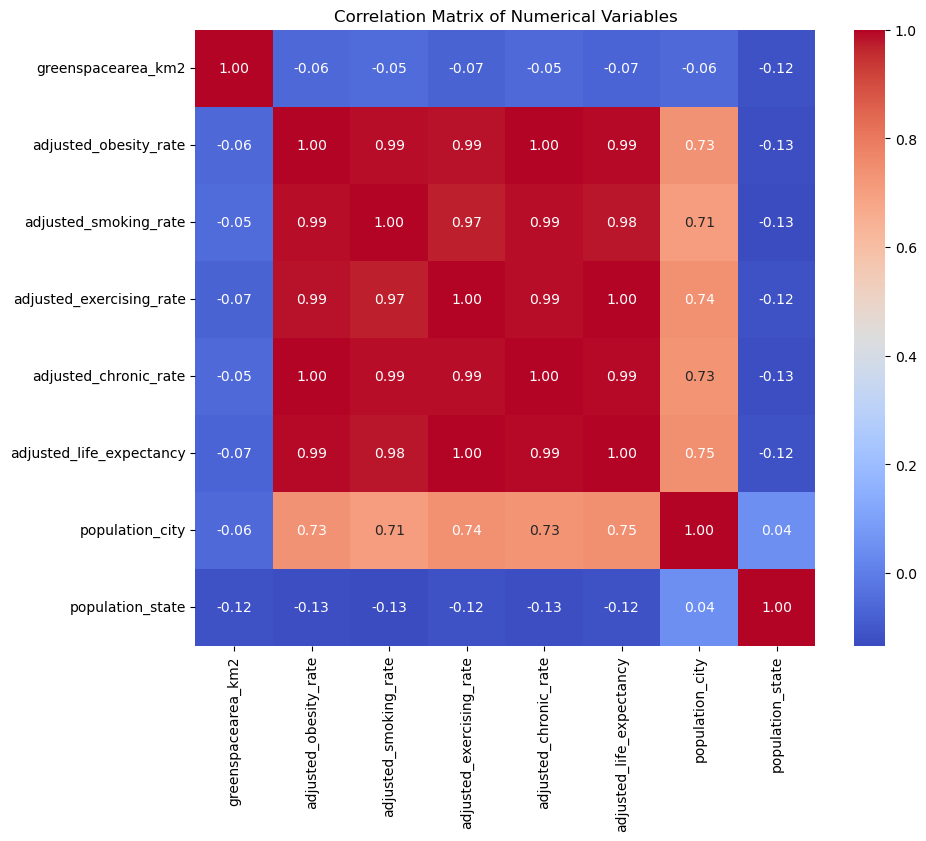

In [7]:
# Select only the numerical columns for correlation matrix

numerical_columns = [
    'greenspacearea_km2', 
    'adjusted_obesity_rate', 
    'adjusted_smoking_rate', 
    'adjusted_exercising_rate', 
    'adjusted_chronic_rate', 
    'adjusted_life_expectancy',
    'population_city',
    'population_state'
]

# Calculate the correlation matrix

corr_matrix = df[numerical_columns].corr()

# Plot a heatmap of the correlation matrix

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

- Since we have a very weak or no correlation between green_space_are and the health metrics, we going to explore non-linear relations through polynomial features.

In [8]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features (degree 2 as an example)

poly = PolynomialFeatures(degree=2, include_bias=False)
polynomial_features = poly.fit_transform(df[['greenspacearea_km2']])

# Convert to DataFrame and add column names

poly_df = pd.DataFrame(polynomial_features, columns=poly.get_feature_names_out(['greenspacearea_km2']))

# Merge with the original dataframe

df_poly = pd.concat([df, poly_df], axis=1)

# Display the new dataframe with polynomial features

print(df_poly.head())

       city     state        country  greenspacearea_km2  \
0  New York  New York  United States                9.58   
1   Chicago  Illinois  United States                0.29   
2     Miami   Florida  United States               35.57   
3   Houston     Texas  United States               52.57   
4    Dallas     Texas  United States               79.91   

   adjusted_obesity_rate  adjusted_smoking_rate  adjusted_exercising_rate  \
0              29.080927              11.110653                 48.983488   
1              22.616110               8.667252                 33.856453   
2               8.497409               3.226864                 14.601560   
3               6.948084               2.348648                  9.668602   
4               6.786088               2.293889                  9.443176   

   adjusted_chronic_rate  adjusted_life_expectancy  population_city  \
0              15.168457                 75.069369       18908608.0   
1              10.563213          

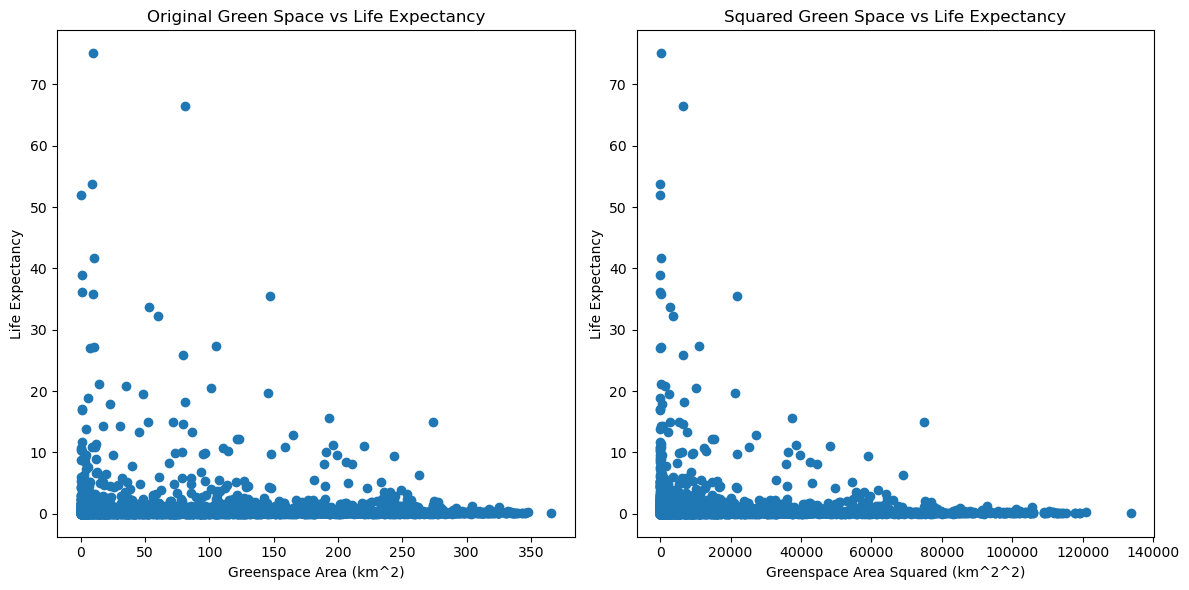

In [9]:
# Scatter plot for the original green space area

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(df['greenspacearea_km2'], df['adjusted_life_expectancy'])
plt.title('Original Green Space vs Life Expectancy')
plt.xlabel('Greenspace Area (km^2)')
plt.ylabel('Life Expectancy')

# Scatter plot for the squared green space area

plt.subplot(1, 2, 2)
plt.scatter(df_poly['greenspacearea_km2^2'], df_poly['adjusted_life_expectancy'])
plt.title('Squared Green Space vs Life Expectancy')
plt.xlabel('Greenspace Area Squared (km^2^2)')
plt.ylabel('Life Expectancy')

plt.tight_layout()
plt.show()

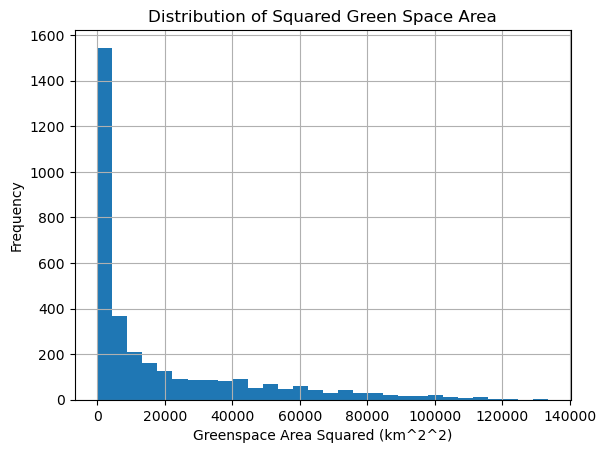

In [10]:
# Histogram of the squared green space area

df_poly['greenspacearea_km2^2'].hist(bins=30)
plt.title('Distribution of Squared Green Space Area')
plt.xlabel('Greenspace Area Squared (km^2^2)')
plt.ylabel('Frequency')
plt.show()

#### Considerations:

1.	Relationship between Green Space and Life Expectancy:

- The scatter plots indicate that there isn’t a strong or clear relationship between green space (both original and squared) and life expectancy. This suggests that either green space doesn’t directly influence life expectancy in your dataset, or that the relationship is more complex and might involve interactions with other variables.
- The squared term did not reveal a stronger relationship, which might indicate that a simple polynomial transformation isn’t sufficient to capture the potential effects of green space on life expectancy.

2.	Distribution and Potential Outliers:

- The skewness and long tail in the distribution of the squared green space area highlight potential issues with outliers. These extreme values might disproportionately influence your model, leading to overfitting or instability.
- Before proceeding with modeling, consider whether to transform this feature (e.g., log transformation) or to apply techniques to manage outliers.

#### Next Steps:

- Interaction Terms: Creating interaction terms between green space and exercise rate to capture potential synergistic effects.

In [11]:
# Calculate the correlation between green space and exercise rate

correlation = df['greenspacearea_km2'].corr(df['adjusted_exercising_rate'])
print(f'Correlation between Green Space Area and Exercise Rate: {correlation:.2f}')

Correlation between Green Space Area and Exercise Rate: -0.07


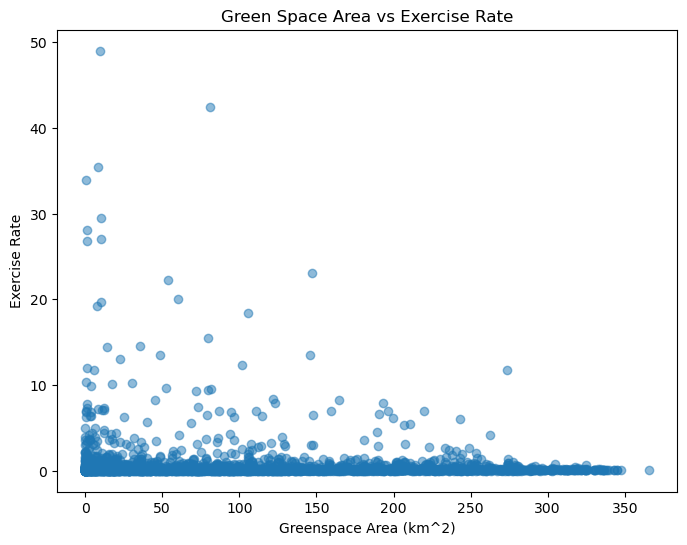

In [12]:
import matplotlib.pyplot as plt

# Scatter plot between green space area and exercise rate

plt.figure(figsize=(8, 6))
plt.scatter(df['greenspacearea_km2'], df['adjusted_exercising_rate'], alpha=0.5)
plt.title('Green Space Area vs Exercise Rate')
plt.xlabel('Greenspace Area (km^2)')
plt.ylabel('Exercise Rate')
plt.show()

#### New dataset where it was added the AQI (Air Quality Index), depression rate and chronic pulmonary disease rate for each city.

In [13]:
# import dataset

data = "/Users/alexandreribeiro/Documents/GitHub/final_project/notebooks/final_dataset.csv"

data = pd.read_csv(data)

data.sample(15)

,city,lat,lng,country,state,population_city,greenspacearea_km2,obesity_rate,smoking_rate,exercising_rate,...,life_expectancy,population_state,adjusted_obesity_rate,adjusted_smoking_rate,adjusted_exercising_rate,adjusted_chronic_rate,adjusted_life_expectancy,AQI,adjusted_copd_rate,adjusted_depression_rate
2963,Athens,39.3270,-82.0987,United States,Ohio,22698.0,73.04,38.1,17.7,48.8,...,75.3,11785935,0.073375,0.034088,0.093982,0.039095,0.145017,1.690196,0.085676,0.251836
5007,Lower Gwynedd,40.1880,-75.2373,United States,Pennsylvania,12085.0,117.08,33.4,15.6,50.8,...,76.8,12961683,0.031141,0.014545,0.047364,0.017249,0.071606,1.952157,0.006154,0.020792
6163,Riverside,41.0318,-73.5827,United States,Connecticut,9093.0,18.42,30.6,10.3,53.7,...,78.4,3617176,0.076923,0.025893,0.134993,0.040221,0.197085,2.054902,0.017656,0.054008
3526,Sharon,42.1085,-71.1830,United States,Massachusetts,18473.0,139.32,27.2,10.7,53.4,...,79.0,7001399,0.071766,0.028232,0.140894,0.042216,0.208439,1.827451,0.013456,0.058574
2388,Clinton,32.3540,-90.3403,United States,Mississippi,27668.0,205.22,39.5,18.1,39.8,...,71.9,2939690,0.371769,0.170355,0.374593,0.205179,0.676714,1.569412,0.007091,0.021417
5238,Norwell,42.1608,-70.8177,United States,Massachusetts,11281.0,122.12,27.2,10.7,53.4,...,79.0,7001399,0.043826,0.017240,0.086041,0.025780,0.127289,1.816471,0.008217,0.035770
2238,Greenville,33.3850,-91.0514,United States,Mississippi,29495.0,181.12,39.5,18.1,39.8,...,71.9,2939690,0.396318,0.181604,0.399328,0.218727,0.721399,1.745882,0.048852,0.183394
370,College Station,30.5852,-96.2959,United States,Texas,213177.0,140.86,35.5,12.0,49.4,...,76.5,30503301,0.248097,0.083864,0.345239,0.116012,0.534632,1.669804,0.039136,0.135580
2717,Socastee,33.6871,-79.0086,United States,South Carolina,24464.0,210.42,35.0,16.2,47.5,...,74.8,5373555,0.159343,0.073753,0.216252,0.078306,0.340539,1.855686,0.030958,0.093785
4414,Jacksonville,33.8088,-85.7545,United States,Alabama,14227.0,128.83,38.3,16.2,45.9,...,73.2,5108468,0.106665,0.045117,0.127831,0.062662,0.203861,1.598431,0.007309,0.025300


In [14]:
# data types

data.dtypes

city                         object
lat                         float64
lng                         float64
country                      object
state                        object
population_city             float64
greenspacearea_km2          float64
obesity_rate                float64
smoking_rate                float64
exercising_rate             float64
chronic_rate                float64
life_expectancy             float64
population_state              int64
adjusted_obesity_rate       float64
adjusted_smoking_rate       float64
adjusted_exercising_rate    float64
adjusted_chronic_rate       float64
adjusted_life_expectancy    float64
AQI                         float64
adjusted_copd_rate          float64
adjusted_depression_rate    float64
dtype: object

In [15]:
# check for missing values

null_values = data.isnull().sum()

# check for duplicates

duplicates = data.duplicated().sum()

duplicates, null_values


(0,
 city                        0
 lat                         0
 lng                         0
 country                     0
 state                       0
 population_city             0
 greenspacearea_km2          0
 obesity_rate                0
 smoking_rate                0
 exercising_rate             0
 chronic_rate                0
 life_expectancy             0
 population_state            0
 adjusted_obesity_rate       0
 adjusted_smoking_rate       0
 adjusted_exercising_rate    0
 adjusted_chronic_rate       0
 adjusted_life_expectancy    0
 AQI                         0
 adjusted_copd_rate          0
 adjusted_depression_rate    0
 dtype: int64)

Correlation Matrix:
                          greenspacearea_km2  adjusted_obesity_rate  \
greenspacearea_km2                  1.000000              -0.043437   
adjusted_obesity_rate              -0.043437               1.000000   
adjusted_smoking_rate              -0.034141               0.989423   
adjusted_exercising_rate           -0.057068               0.982600   
adjusted_chronic_rate              -0.036506               0.995641   
adjusted_life_expectancy           -0.051966               0.992213   
adjusted_copd_rate                 -0.024228               0.637682   
adjusted_depression_rate           -0.043218               0.647310   
AQI                                -0.216264               0.014754   

                          adjusted_smoking_rate  adjusted_exercising_rate  \
greenspacearea_km2                    -0.034141                 -0.057068   
adjusted_obesity_rate                  0.989423                  0.982600   
adjusted_smoking_rate                 

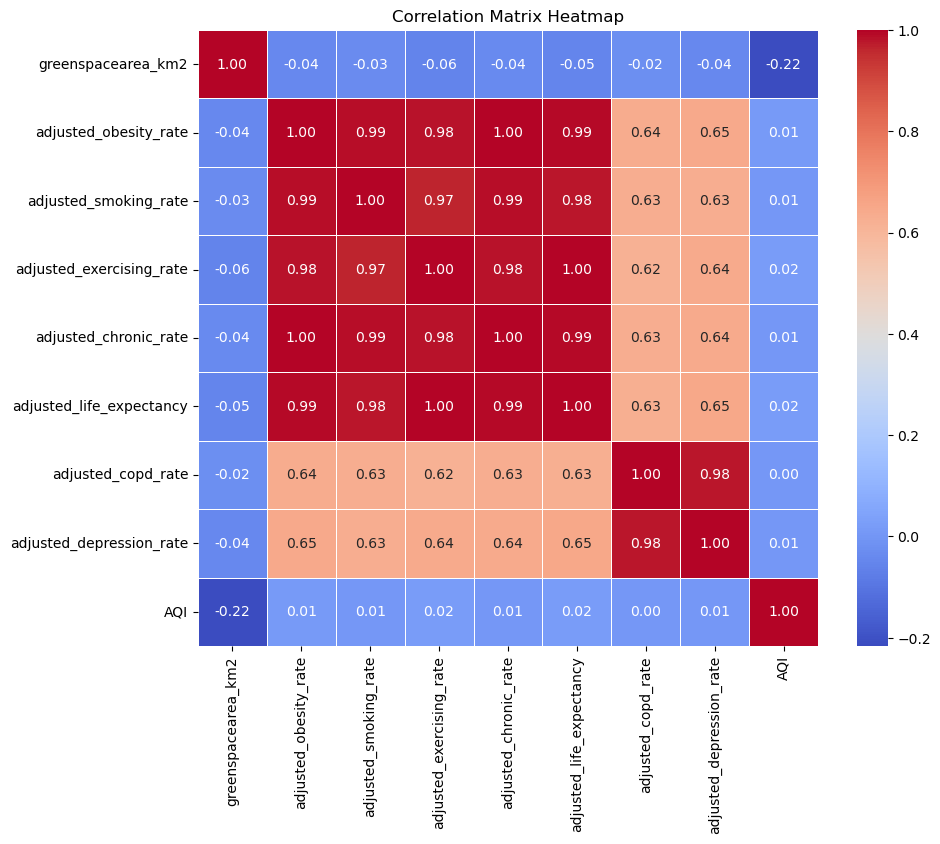

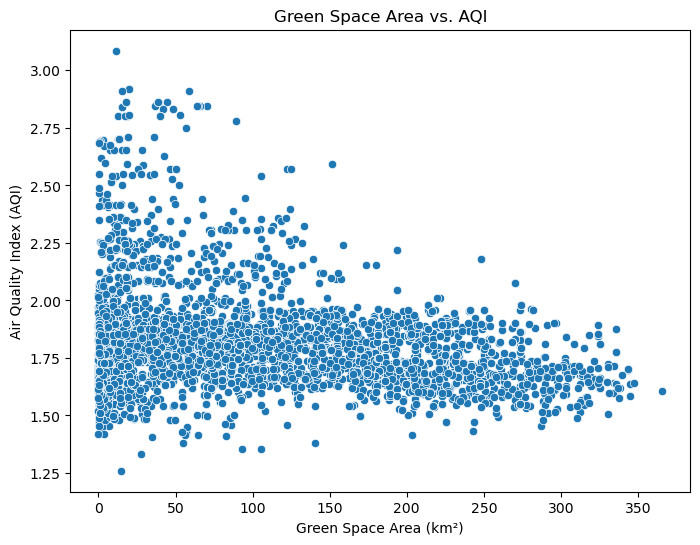

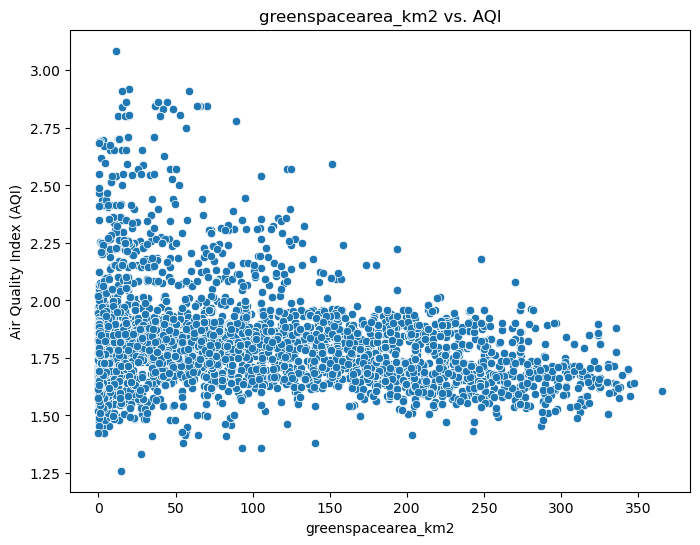

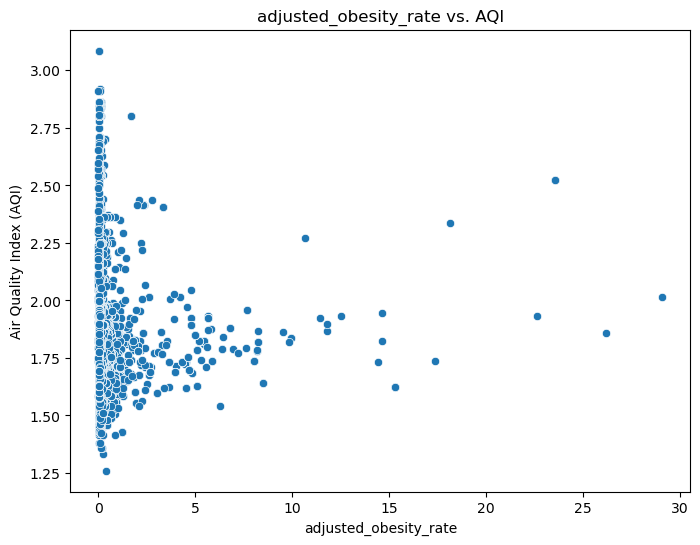

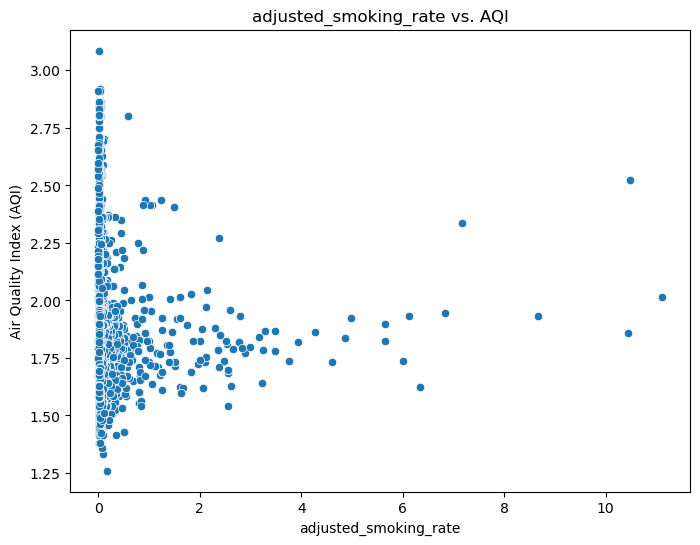

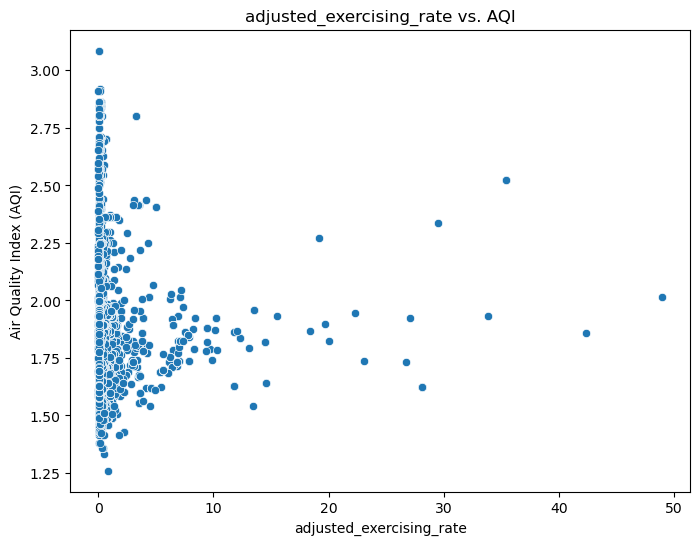

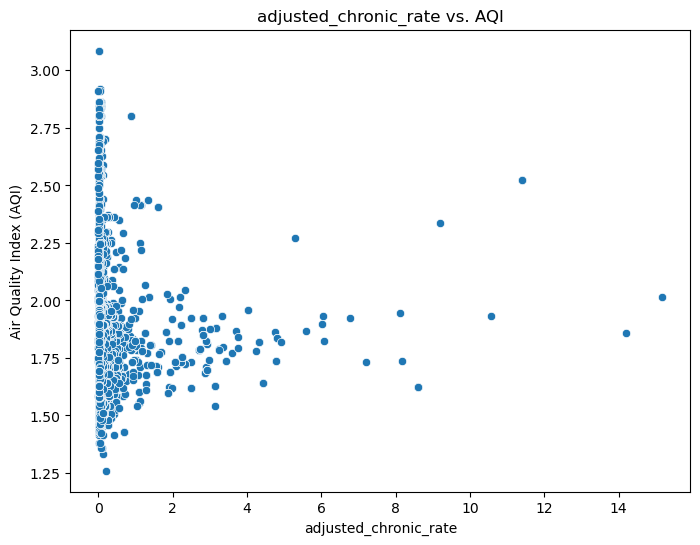

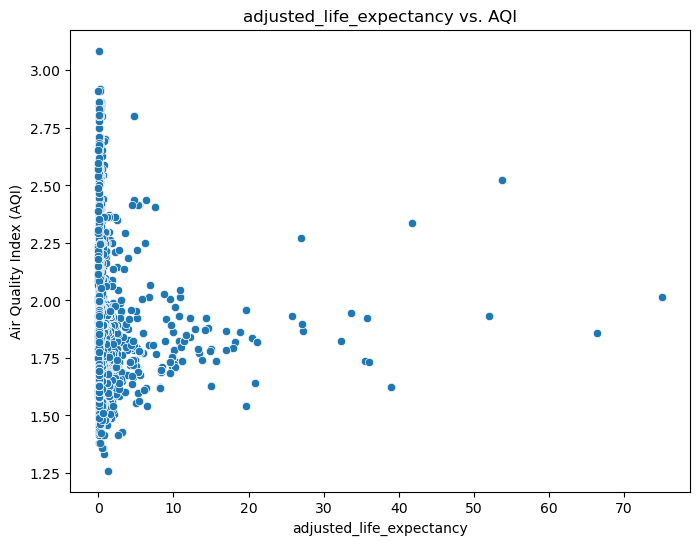

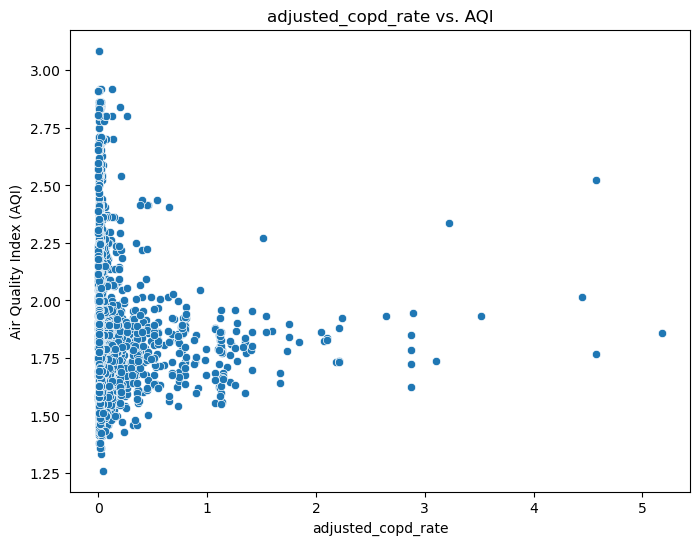

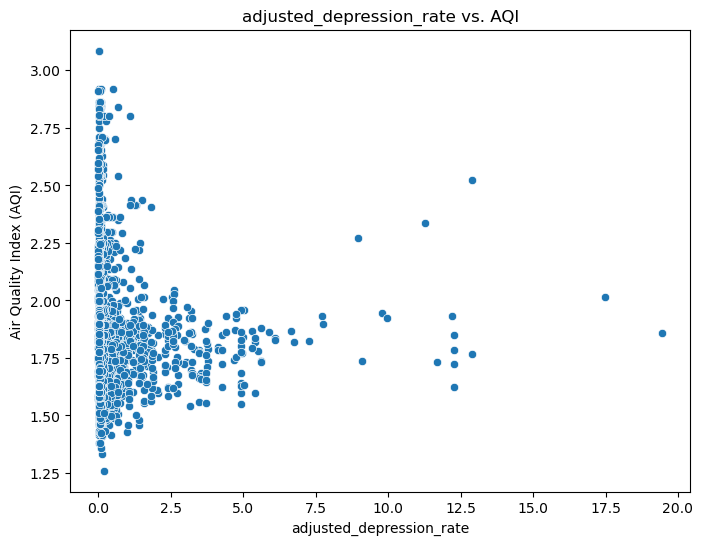

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant columns for correlation analysis
relevant_columns = [
    'greenspacearea_km2', 
    'adjusted_obesity_rate', 
    'adjusted_smoking_rate', 
    'adjusted_exercising_rate', 
    'adjusted_chronic_rate', 
    'adjusted_life_expectancy', 
    'adjusted_copd_rate',
    'adjusted_depression_rate',
    'AQI'
]

# Create a DataFrame with only the relevant columns
df_corr = data[relevant_columns]

# Calculate the correlation matrix
corr_matrix = df_corr.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Visualize the correlation between green space area and AQI
plt.figure(figsize=(8, 6))
sns.scatterplot(x='greenspacearea_km2', y='AQI', data=data)
plt.title('Green Space Area vs. AQI')
plt.xlabel('Green Space Area (km²)')
plt.ylabel('Air Quality Index (AQI)')
plt.show()

# Optionally, plot scatter plots for other variables against AQI
for col in relevant_columns[:-1]:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=col, y='AQI', data=data)
    plt.title(f'{col} vs. AQI')
    plt.xlabel(col)
    plt.ylabel('Air Quality Index (AQI)')
    plt.show()

#### Outlier Detection

- Used the Interquartile Range (IQR) method to detect outliers for numerical features.
- The IQR method defines outliers as values that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.

In [17]:
data.describe()

,lat,lng,population_city,greenspacearea_km2,obesity_rate,smoking_rate,exercising_rate,chronic_rate,life_expectancy,population_state,adjusted_obesity_rate,adjusted_smoking_rate,adjusted_exercising_rate,adjusted_chronic_rate,adjusted_life_expectancy,AQI,adjusted_copd_rate,adjusted_depression_rate
count,6449.000000,6449.000000,6.449000e+03,6449.000000,6449.000000,6449.000000,6449.000000,6449.00000,6449.000000,6.449000e+03,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000
mean,38.311369,-89.391275,8.063339e+04,104.363176,33.531555,13.605706,50.838559,17.29831,76.743107,1.222772e+07,0.366565,0.151797,0.559732,0.190700,0.838770,1.811067,0.070080,0.244747
std,4.639545,15.400010,3.951187e+05,89.388791,3.816881,2.978490,4.362368,2.43774,1.796350,1.036145e+07,1.263794,0.523113,2.000763,0.653999,2.969478,0.195723,0.238293,0.841087
min,19.582800,-159.356400,8.506000e+03,0.010000,24.300000,6.900000,36.900000,12.90000,71.900000,5.840570e+05,0.006151,0.002167,0.011995,0.003174,0.017292,1.259608,0.000963,0.003984
25%,35.006300,-95.546000,1.276800e+04,21.670000,30.200000,11.500000,48.800000,15.70000,75.300000,5.737915e+06,0.042455,0.016835,0.066649,0.022115,0.101822,1.689412,0.007617,0.026833
50%,39.445000,-85.375000,2.038700e+04,84.920000,33.400000,12.800000,50.700000,16.60000,76.800000,8.715698e+06,0.085441,0.034792,0.129990,0.043934,0.196615,1.798431,0.016339,0.057222
75%,41.572900,-77.320800,4.408600e+04,180.930000,37.000000,16.000000,54.300000,18.50000,77.800000,1.296168e+07,0.230274,0.091906,0.339716,0.118573,0.516389,1.876078,0.042534,0.149942
max,48.950200,-68.716600,1.890861e+07,365.580000,41.000000,22.300000,63.200000,25.50000,80.700000,3.896519e+07,29.080927,11.110653,48.983488,15.168457,75.069369,3.085490,5.181367,19.451363


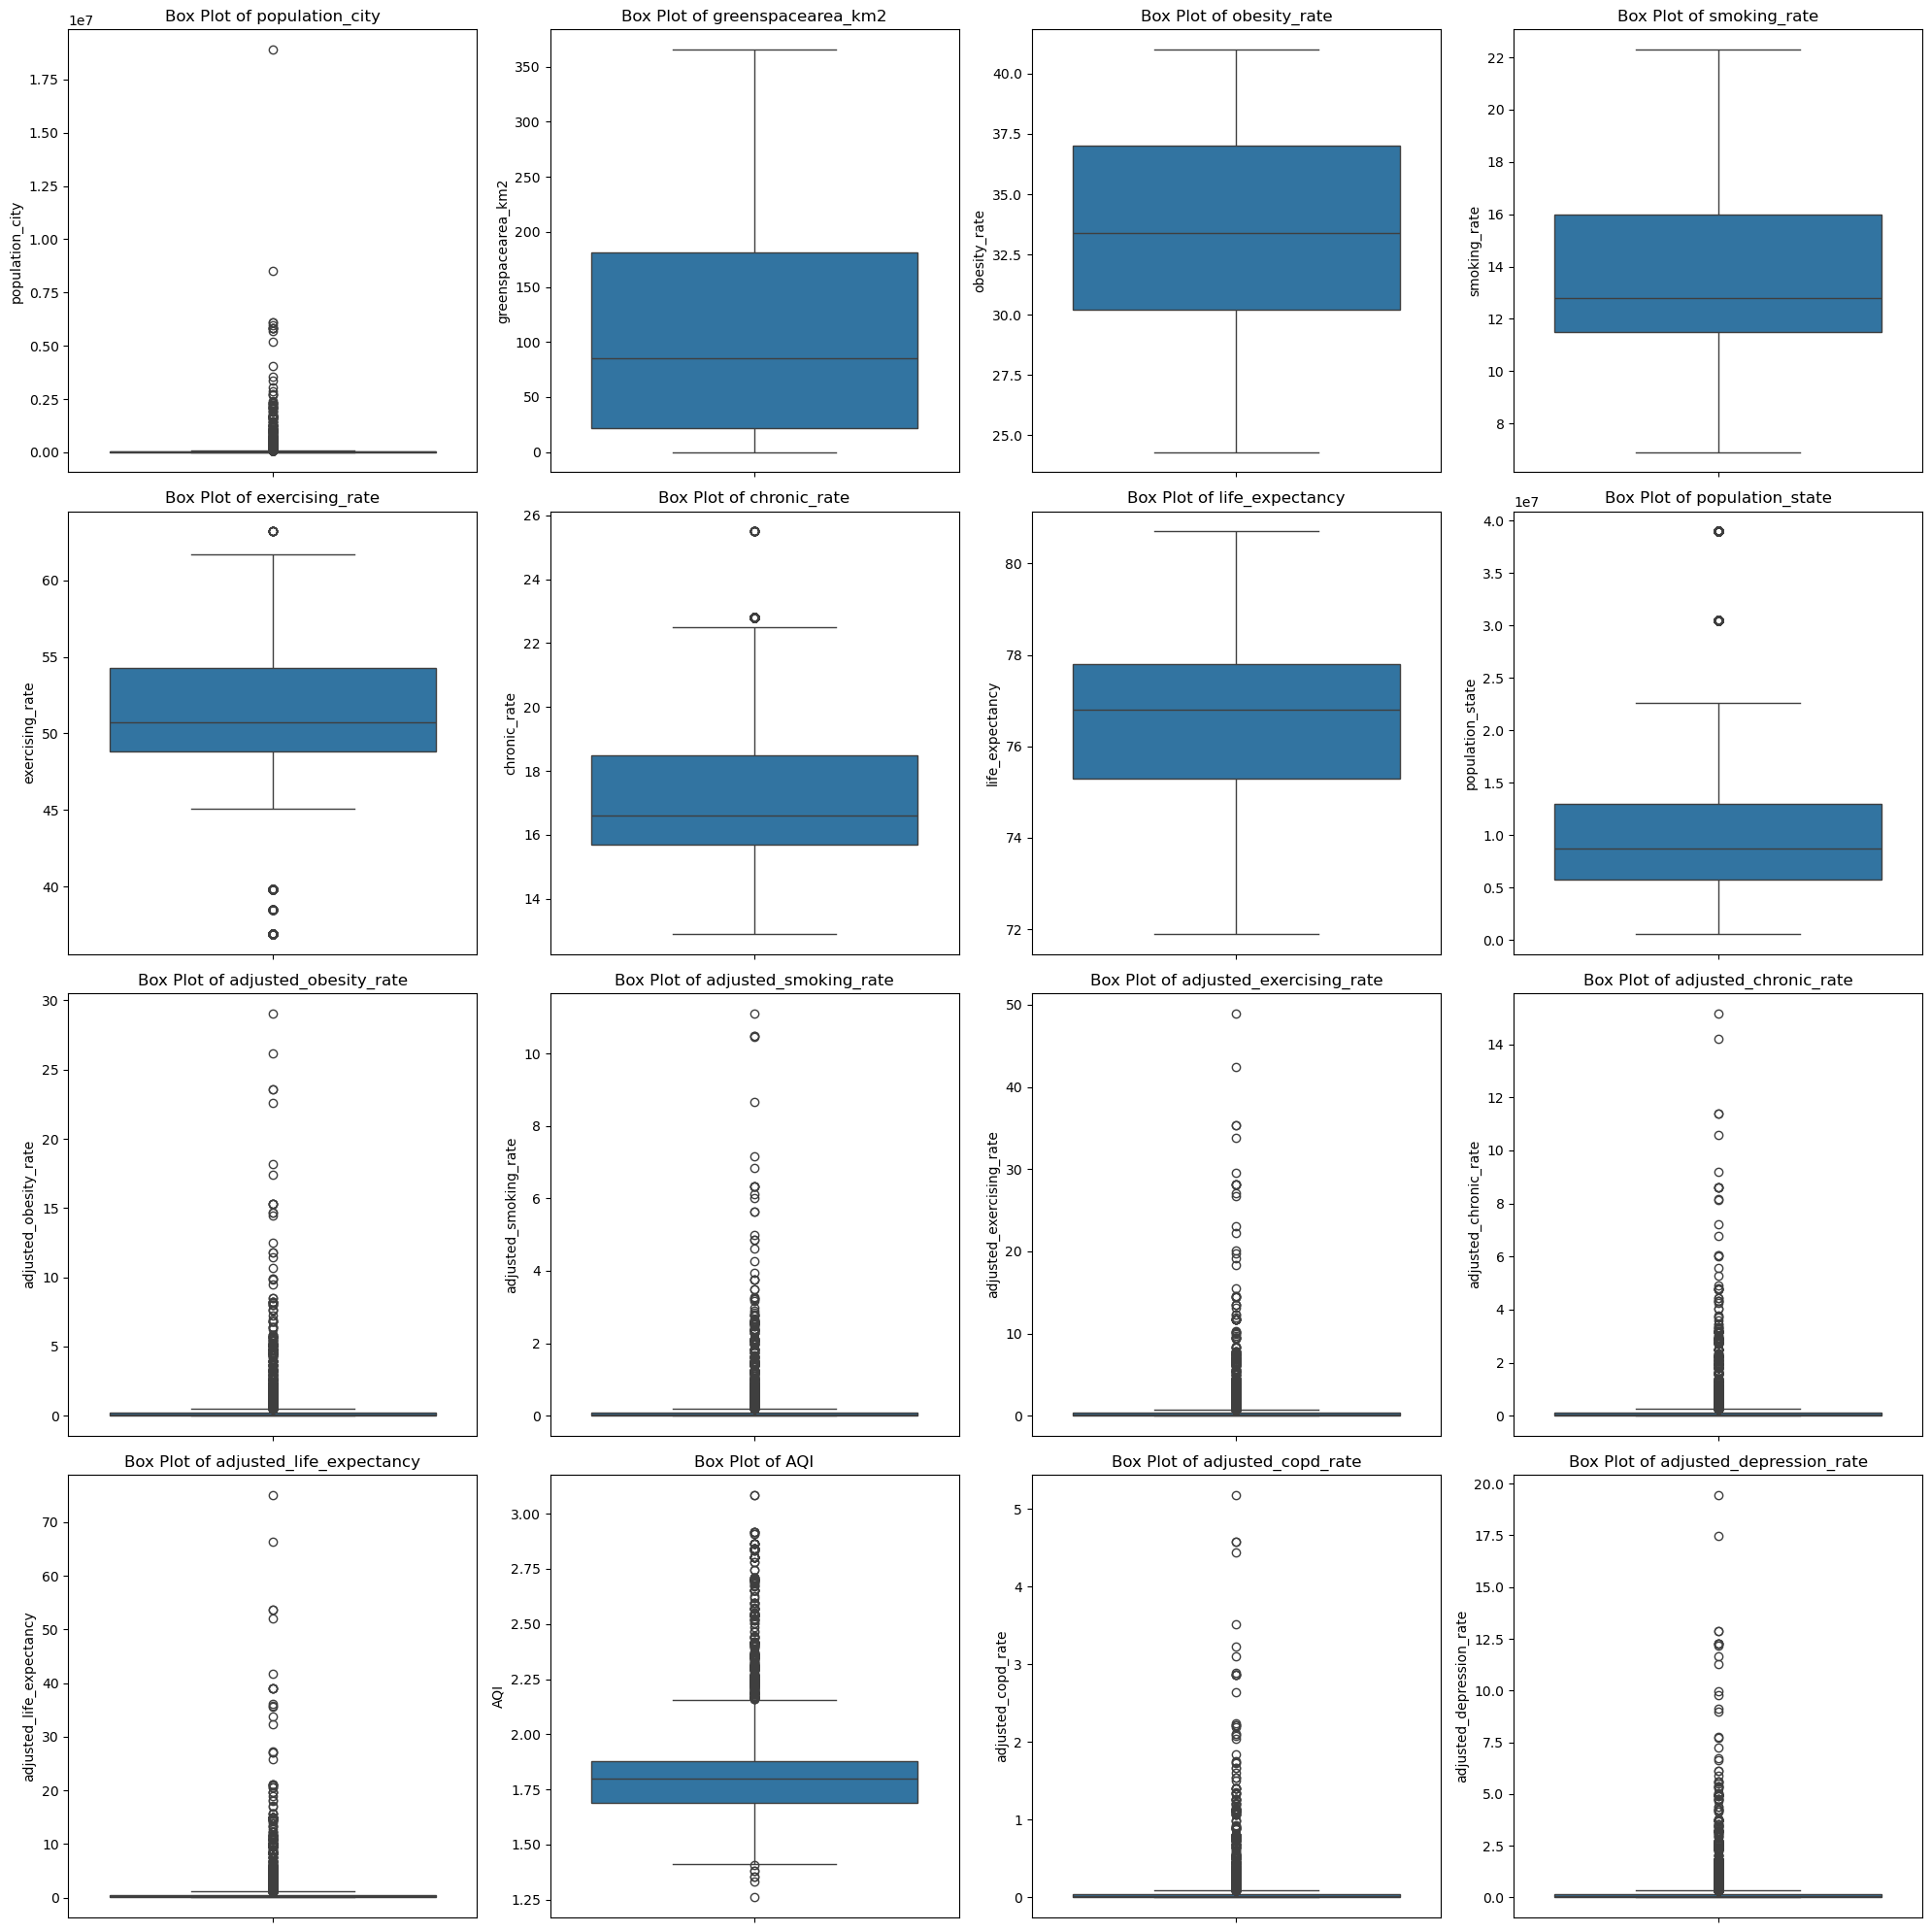

In [18]:
# List of continuous variables

df = data.copy()

continuous_vars = [
    'population_city', 'greenspacearea_km2', 'obesity_rate',
    'smoking_rate', 'exercising_rate', 'chronic_rate', 'life_expectancy',
    'population_state', 'adjusted_obesity_rate', 'adjusted_smoking_rate',
    'adjusted_exercising_rate', 'adjusted_chronic_rate', 'adjusted_life_expectancy',
    'AQI', 'adjusted_copd_rate', 'adjusted_depression_rate'
]

# Plot box plots for each continuous variable

plt.figure(figsize=(20, 20))  # Increased the figure size for better visualization
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(4, 4, i)  # Adjusted to a 4x4 grid to accommodate 16 variables
    sns.boxplot(data=df[var])
    plt.title(f'Box Plot of {var}')

plt.tight_layout()
plt.show()

##### Summary of Box Plot Analysis:

1.	Population City & Population State:

- Population City: Shows extreme outliers. This could be due to large cities with populations much higher than the median. These outliers may be valid as they represent significant differences between large metropolitan areas and smaller towns.
- Population State: Also shows some outliers, but the range is broader, which suggests that there are states with significantly higher populations.

2.	Green Space Area (greenspacearea_km2):

- The distribution is fairly spread out with a few outliers. Cities with very high green space might be the outliers, which could be valid or could indicate data entry issues.
	
3.	Health Metrics (obesity_rate, smoking_rate, exercising_rate, chronic_rate, life_expectancy):

- Obesity Rate, Smoking Rate, Exercising Rate, Chronic Rate, Life Expectancy: These distributions are fairly tight, with fewer outliers. These metrics show a more consistent distribution across the cities/states.

4.	Adjusted Health Metrics:

- Adjusted Obesity Rate, Adjusted Smoking Rate, Adjusted Exercising Rate, Adjusted Chronic Rate, Adjusted Life Expectancy: These variables show many outliers, likely because they are adjusted metrics that reflect specific factors like age or socioeconomic status, leading to more variability.

- The spread is wide, particularly for adjusted life expectancy and chronic rate, indicating significant variation in these metrics across different regions.

5.	Air Quality Index (AQI):

- The AQI data shows a moderate spread with some outliers, likely due to significant differences in pollution levels across different cities.

6.	Adjusted COPD and Depression Rates:

- Both variables exhibit a large number of outliers, indicating a high variability across different cities/states. This could reflect varying health care access, environmental factors, or socio-economic disparities.

In [19]:
def remove_outliers_iqr(df, columns):
    """
    Remove outliers from a DataFrame using the IQR method.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    columns (list): List of columns to apply the outlier removal to.
    
    Returns:
    pd.DataFrame: The DataFrame with outliers removed.
    """
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Columns to apply IQR method on
columns_to_treat = ['greenspacearea_km2', 'population_city', 'obesity_rate', 'smoking_rate', 
                    'exercising_rate', 'chronic_rate', 'life_expectancy', 'AQI',
                    'adjusted_obesity_rate', 'adjusted_smoking_rate', 'adjusted_exercising_rate', 
                    'adjusted_chronic_rate', 'adjusted_life_expectancy', 'adjusted_copd_rate', 
                    'adjusted_depression_rate']

# Apply the IQR outlier removal method
df_cleaned = remove_outliers_iqr(df.copy(), columns_to_treat)

print("Number of records after IQR outlier removal:", len(df_cleaned))

Number of records after IQR outlier removal: 3238


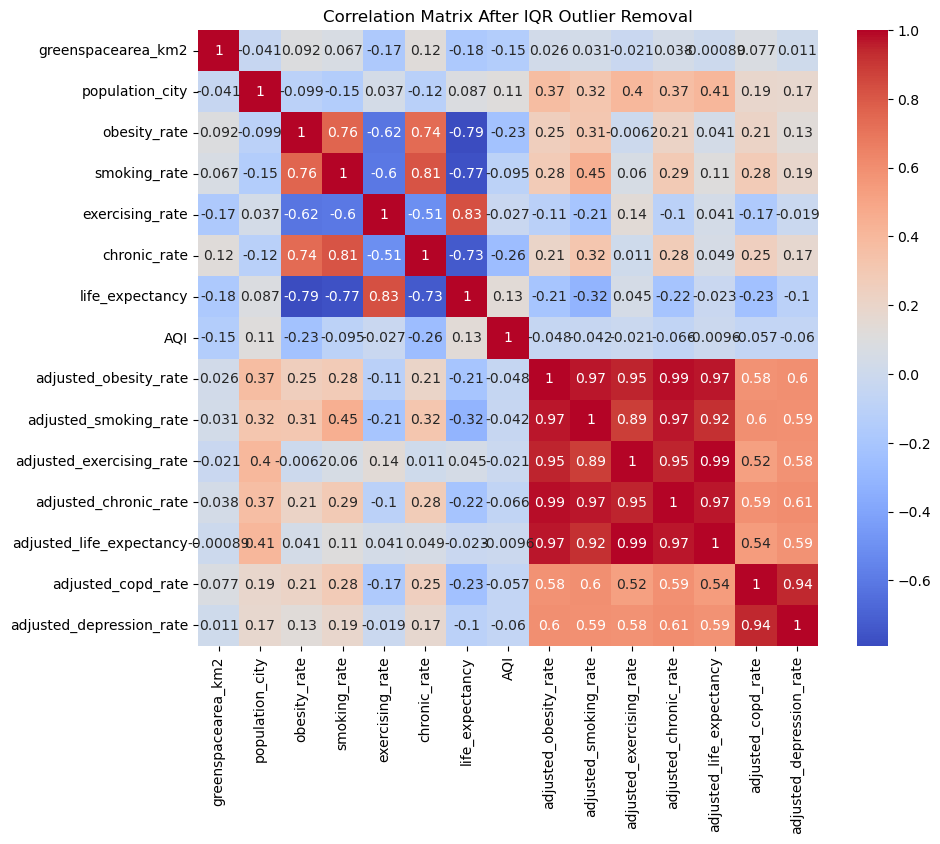

In [20]:
# Select only the columns you want to analyze

columns_to_treat = [
    'greenspacearea_km2', 'population_city', 'obesity_rate', 'smoking_rate', 
    'exercising_rate', 'chronic_rate', 'life_expectancy', 'AQI',
    'adjusted_obesity_rate', 'adjusted_smoking_rate', 'adjusted_exercising_rate', 
    'adjusted_chronic_rate', 'adjusted_life_expectancy', 'adjusted_copd_rate', 
    'adjusted_depression_rate'
]

# Filter the DataFrame to include only these columns

df_cleaned_selected = df_cleaned[columns_to_treat]

# Calculate the correlation matrix for the selected columns

corr_matrix_cleaned = df_cleaned_selected.corr()

# Visualize the correlation matrix

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_cleaned, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix After IQR Outlier Removal")
plt.show()

##### Summary:

1.	Green Space Area (greenspacearea_km2):

- Still shows a negative correlation with AQI (-0.15), indicating that larger green spaces are associated with better air quality (lower AQI).
- Weak correlations with most health metrics, suggesting that green space might not have a strong direct impact on the health outcomes in this dataset.

2.	Population (population_city):

- Shows a slight positive correlation with AQI (0.11), meaning larger populations might be associated with 
worse air quality.

- Has a weak correlation with health metrics, likely because the population is influencing other factors rather than directly impacting health.
	
3.	Obesity, Smoking, Exercising, Chronic Rates, and Life Expectancy:

- These metrics are highly correlated with each other, especially after adjustments. This suggests that these health behaviors and outcomes are interrelated, which is expected.
- The correlation with AQI remains generally weak, indicating that air quality might not be the dominant factor affecting these health outcomes in this dataset.

4.	COPD and Depression Rates:

- Show moderate to strong correlations with other health metrics (such as adjusted_chronic_rate), but weak correlations with AQI and greenspacearea_km2.

#### Using Z-score Standardization to Normalize the Data

- IQR removes extreme outliers: After removing the most extreme values, the remaining data is expected to be more centered and typical.

- Z-score standardization ensures that all features have the same scale: Even without outliers, features can still be on vastly different scales. For instance, the population of a city could be in the millions, while the smoking rate might be a percentage between 0 and 100. Z-score standardization makes sure that these different scales don’t disproportionately influence the model.

In [21]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming df_cleaned is your DataFrame after IQR outlier removal
columns_to_scale = ['greenspacearea_km2', 'population_city', 'obesity_rate', 'smoking_rate', 
                    'exercising_rate', 'chronic_rate', 'life_expectancy', 'AQI',
                    'adjusted_obesity_rate', 'adjusted_smoking_rate', 'adjusted_exercising_rate', 
                    'adjusted_chronic_rate', 'adjusted_life_expectancy', 'adjusted_copd_rate', 
                    'adjusted_depression_rate']

# Step 2: Initialize the scaler
scaler = StandardScaler()

# Step 3: Apply the scaler to the selected columns
df_cleaned[columns_to_scale] = scaler.fit_transform(df_cleaned[columns_to_scale])

df_cleaned.describe()

,lat,lng,population_city,greenspacearea_km2,obesity_rate,smoking_rate,exercising_rate,chronic_rate,life_expectancy,population_state,adjusted_obesity_rate,adjusted_smoking_rate,adjusted_exercising_rate,adjusted_chronic_rate,adjusted_life_expectancy,AQI,adjusted_copd_rate,adjusted_depression_rate
count,3238.000000,3238.000000,3.238000e+03,3.238000e+03,3.238000e+03,3.238000e+03,3.238000e+03,3.238000e+03,3.238000e+03,3.238000e+03,3238.000000,3.238000e+03,3.238000e+03,3.238000e+03,3.238000e+03,3.238000e+03,3.238000e+03,3.238000e+03
mean,38.273345,-87.444311,1.404408e-16,-3.949898e-17,1.667735e-15,5.266530e-17,1.187164e-15,-8.777551e-17,-4.458996e-15,1.366464e+07,0.000000,1.404408e-16,-3.159918e-16,-1.053306e-16,1.755510e-16,-5.310418e-16,1.053306e-16,5.266530e-17
std,4.901393,13.806837,1.000154e+00,1.000154e+00,1.000154e+00,1.000154e+00,1.000154e+00,1.000154e+00,1.000154e+00,9.136565e+06,1.000154,1.000154e+00,1.000154e+00,1.000154e+00,1.000154e+00,1.000154e+00,1.000154e+00,1.000154e+00
min,24.564200,-124.156400,-8.732835e-01,-1.174212e+00,-2.417900e+00,-2.492402e+00,-1.889156e+00,-1.850850e+00,-2.660150e+00,1.964726e+06,-1.472167,-1.402237e+00,-1.437970e+00,-1.470879e+00,-1.467108e+00,-2.831336e+00,-1.375070e+00,-1.397610e+00
25%,34.593550,-93.168700,-6.636284e-01,-9.104983e-01,-7.205305e-01,-7.169067e-01,-5.453482e-01,-6.609209e-01,-6.197209e-01,7.001399e+06,-0.772988,-7.637239e-01,-7.995666e-01,-7.760388e-01,-7.945602e-01,-7.495173e-01,-7.641416e-01,-7.981184e-01
50%,39.815900,-83.846300,-3.278894e-01,-2.338289e-01,-1.306065e-03,-2.151364e-01,-1.390809e-01,-1.952964e-01,-5.684397e-02,1.102923e+07,-0.209846,-2.505974e-01,-2.088396e-01,-2.296084e-01,-2.040554e-01,1.189338e-01,-2.442916e-01,-2.103351e-01
75%,41.568125,-77.189700,2.932229e-01,7.953120e-01,8.617633e-01,8.655997e-01,7.047052e-01,5.807444e-01,5.763926e-01,1.957122e+07,0.605511,5.237414e-01,6.317254e-01,5.913972e-01,6.304160e-01,6.577429e-01,5.746032e-01,6.317697e-01
max,48.950200,-70.067600,5.580401e+00,2.653283e+00,1.926215e+00,2.525301e+00,2.517283e+00,2.857131e+00,1.631787e+00,3.896519e+07,3.269074,3.826837e+00,3.276036e+00,2.942632e+00,2.889316e+00,2.909064e+00,3.851202e+00,2.945621e+00


In [22]:
# Focus just on relevant variables

# Filter the dataset to keep only the selected columns

selected_columns = [
    'city', 'country', 'population_city', 'greenspacearea_km2', 'AQI',
    'adjusted_obesity_rate', 'adjusted_smoking_rate', 'adjusted_exercising_rate',
    'adjusted_chronic_rate', 'adjusted_life_expectancy', 'adjusted_copd_rate',
    'adjusted_depression_rate'
]

df_filtered = df_cleaned[selected_columns]

df_filtered.head()

,city,country,population_city,greenspacearea_km2,AQI,adjusted_obesity_rate,adjusted_smoking_rate,adjusted_exercising_rate,adjusted_chronic_rate,adjusted_life_expectancy,adjusted_copd_rate,adjusted_depression_rate
852,Town 'n' Country,United States,5.580401,-0.012540,0.014227,1.682852,1.389244,2.119851,1.772071,1.960849,1.628696,1.211327
861,Atascocita,United States,5.553693,0.516264,-0.078162,1.117487,0.624299,0.883269,0.895887,0.976170,0.587606,0.611860
863,Fort Myers,United States,5.520049,0.080073,-0.946613,1.654772,1.364492,2.087964,1.743226,1.930107,1.602239,1.187964
881,Citrus Heights,United States,5.394723,-0.529781,1.806562,0.032259,-0.171918,0.500936,0.056370,0.420931,-0.243810,0.002308
889,San Ramon,United States,5.314361,-0.271656,2.521032,0.012965,-0.187696,0.476070,0.036783,0.396717,-0.258318,-0.015646


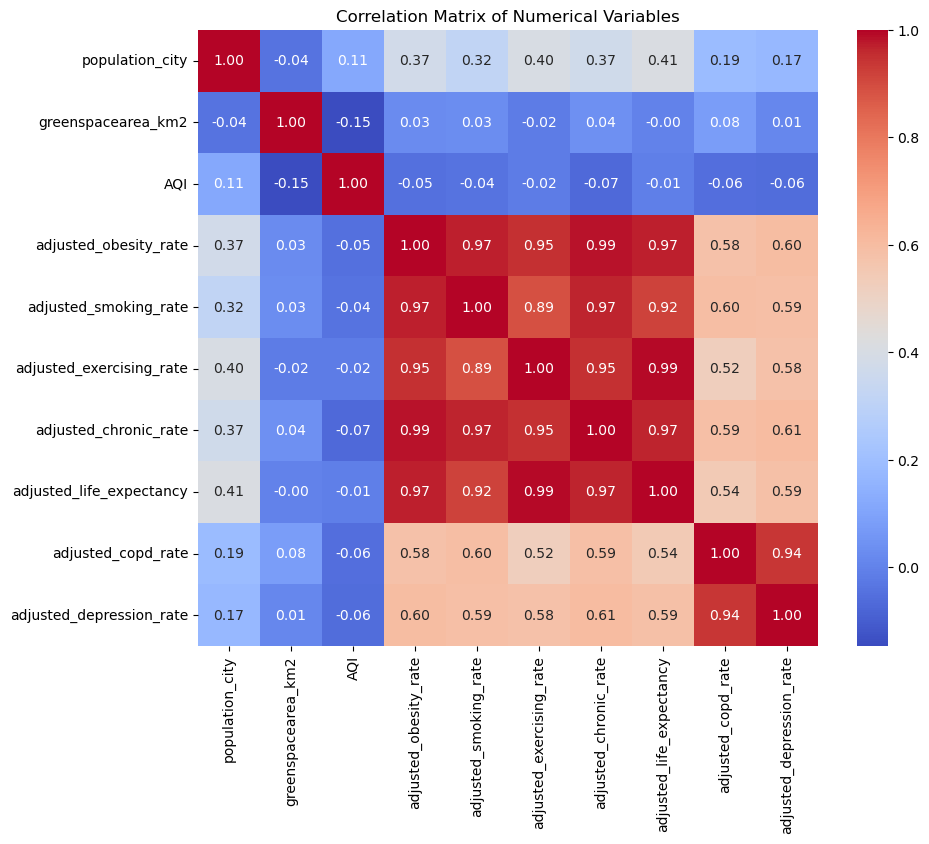

In [23]:
numerical_columns = [
    'population_city', 'greenspacearea_km2', 'AQI', 'adjusted_obesity_rate',
      'adjusted_smoking_rate', 'adjusted_exercising_rate', 'adjusted_chronic_rate',
        'adjusted_life_expectancy', 'adjusted_copd_rate', 'adjusted_depression_rate'
]

# Calculate the correlation matrix

corr_matrix = df_filtered[numerical_columns].corr()

# Plot a heatmap of the correlation matrix

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

#### Dropping highly correlated features to avoid multicollinearity

1.	Drop Adjusted Chronic Rate: Since it’s highly correlated with other variables like adjusted_obesity_rate and adjusted_smoking_rate, it’s better to remove it to reduce redundancy.

2.	Drop Adjusted Exercising Rate: Because of its high correlation with other features and its overlap with the general health indicators, it’s another candidate for removal.

3.	Exclude Adjusted Life Expectancy: Since this is your target variable, it should not be included as a feature.

In [24]:
# Load your dataset
df = df_filtered.copy()

# List of features to include
selected_features = [
    'population_city', 
    'greenspacearea_km2', 
    'AQI', 
    'adjusted_obesity_rate', 
    'adjusted_smoking_rate', 
    'adjusted_copd_rate', 
    'adjusted_depression_rate',
    'adjusted_life_expectancy'
]

# Select the features
df_ml = df[selected_features]

# Save the prepared dataset to a new CSV file
df_ml.to_csv('dataset_for_ml.csv', index=False)
